-----------------------------------------------------------------------------------------------------------------------
# **Clasificación de Imágenes de Moda con Redes Neuronales Convolucionales**
-----------------------------------------------------------------------------------------------------------------------

--------------------
## **Contexto**
--------------------

El conjunto de datos Fashion MNIST se ha convertido en un referente en el campo de la visión por computadora y el aprendizaje profundo. Al proporcionar un reto más desafiante que el clásico MNIST de dígitos manuscritos, permite evaluar la capacidad de los modelos para identificar patrones más complejos y variados presentes en artículos de moda. Este laboratorio se centra en el desarrollo de un modelo de red neuronal convolucional (CNN) capaz de aprender representaciones visuales discriminativas de estas imágenes.


-----------------------
## **Objetivo**
-----------------------

El objetivo principal de este laboratorio es desarrollar una red neuronal capaz de identificar diferentes prendas de vestir a partir de imágenes, utilizando el conjunto de datos Fashion MNIST. Buscamos entrenar este sistema para que pueda clasificar con precisión diversos artículos de moda, como camisetas, pantalones o zapatillas, y que demuestre una precisión de clasificación superior al 90% en imágenes nuevas y no vistas.

------------------------------------
## **Descripción del Dataset**
------------------------------------

El conjunto de datos Fashion MNIST contiene un total de 70.000 imágenes en escala de grises, distribuidas de la siguiente manera:

- **Entrenamiento:** 60.000 imágenes.
- **Prueba:** 10.000 imágenes.

Cada imagen tiene una resolución de 28 x 28 píxeles y un solo canal (blanco y negro). Las imágenes representan 10 categorías distintas de artículos de moda:

0. T-shirt/top (Camiseta/Top)
1. Trouser (Pantalón)
2. Pullover (Suéter)
3. Dress (Vestido)
4. Coat (Abrigo)
5. Sandal (Sandalia)
6. Shirt (Camisa)
7. Sneaker (Zapatilla deportiva)
8. Bag (Bolso)
9. Ankle boot (Bota corta)

Cada imagen está etiquetada con su correspondiente clase numérica, lo que permite el entrenamiento supervisado de los modelos de clasificación.


## **Importación de liberías y revisión de la base de datos**

En primer lugar, importamos todas las librerías necesarias para el desarrollo de este proyecto. Utilizaremos TensorFlow como framework de redes neuronales, NumPy para manipulación de datos matriciales y Matplotlib para visualización de imágenes y gráficos.

In [39]:


# Celda con la importación de librerias

import tensorflow as tf         # Importar TensorFlow
from tensorflow import keras    # Importar la APItensorflow.keras de TensorFlow

import numpy as np              # Librería para trabajar don datos matriciales

import matplotlib.pyplot as plt # Librería para gráficas y visualización

# Librería para codificar etiquetas en one-hot
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Dropout

# Inicialización de semillas
tf.random.set_seed(42)
np.random.seed(42)



### **Cargando el dataset**

In [40]:


# Conjunto de datos Fashion MNIST
from tensorflow.keras.datasets import fashion_mnist



### **Definimos la función para cargar los datos y preprocesarlos**

El dataset Fashion MNIST se encuentra disponible directamente en Keras. Procedemos a cargarlo, normalizar sus imágenes (para que los valores estén entre 0 y 1), y convertir sus etiquetas a formato one-hot, que es el formato adecuado para la clasificación multiclase con redes neuronales.

In [41]:
def load_data(mnist):
    """
    Esta función carga al entorno de trabajo los datos de entrenamiento, y prueba. Con sus
    etiquetas codificadas con one-hot encoding.
    Parámetros de entrada:
    mnist = Clase detensorflow.keras.datsets con el conjunto de datos fashion mnist
    Parámetros de salida:
    X_train = Conjunto de datos para entrenamiento
    X_test = Conjunto de datos para prueba
    y_train_onehot = Etiquetas del conjunto de entrenamiento codificadas en one-hot
    y_test_onehot = Etiquetas del conjunto de prueba codificadas en one-hot
    y_train = Etiqueta original del conjunto de entrenamiento
    y_test = Etiqueta original del conjunto de prueba
    """

    # Establecer el conjunto de entrenamiento y el conjunto de prueba con sus respectivas
    # etiquetas
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    # Normalización de los valores de los pixeles de las imágenes
    X_train, X_test = X_train / 255.0, X_test / 255.0

    # Codificación One-Hot para las etiquetas
    y_train_onehot = to_categorical(y_train)
    y_test_onehot =  to_categorical(y_test)

    print(f'Conjunto de datos cargados')
    print(f'Tamaño imágenes de entrenamiento {X_train.shape}')
    print(f'Tamaño imágenes de test {X_test.shape}')
    print(f'Datos por cada etiqueta en X train {np.bincount(y_train)}')

    return X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1)), y_train_onehot, y_test_onehot, y_train, y_test
### END READ ONLY

In [42]:
X_train, X_test, y_train_onehot, y_test_onehot, y_train, y_test = load_data(fashion_mnist)

Conjunto de datos cargados
Tamaño imágenes de entrenamiento (60000, 28, 28)
Tamaño imágenes de test (10000, 28, 28)
Datos por cada etiqueta en X train [6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


### **Visualización inicial de una instancia por cada clase**

A continuación, realizamos una primera inspección visual del conjunto de entrenamiento. Mostraremos una imagen representativa de cada una de las 10 clases para familiarizarnos con los datos.

In [43]:


def visualize_instances(X_data, y_data):
    """
    Esta función visualiza una instancia de cada categoria del conjunto mnist
    Parámetros de entrada:
    X_data = Instancias
    y_data = Etiquetas
    Parámetros de salida:
    Grafica con la visualización de la imagen por cada isntancia.
    """
    fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(10, 5))
    ax = ax.flatten()
    for i in range(10):
        img = X_data[y_data == i][0].reshape((28, 28))
        ax[i].imshow(img, cmap='gist_yarg')
        ax[0].set_xticks([])
        ax[0].set_yticks([])
    return plt.show()



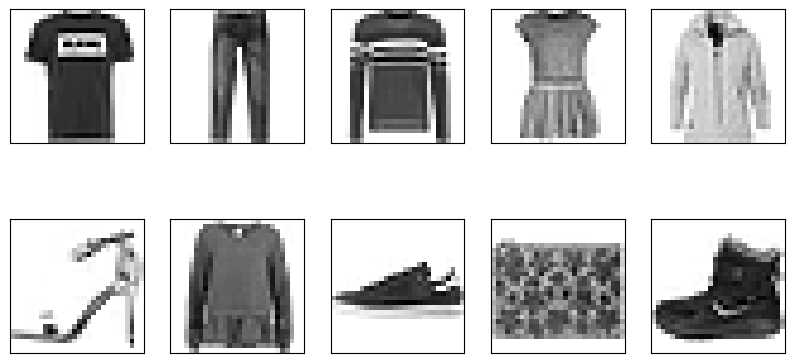

In [44]:
visualize_instances(X_train, y_train)

### **Distribución de clases en el conjunto de entrenamiento**

Es importante verificar la distribución de clases para conocer si existen clases desbalanceadas. En este caso, verificamos que cada clase tiene la misma cantidad de imágenes.

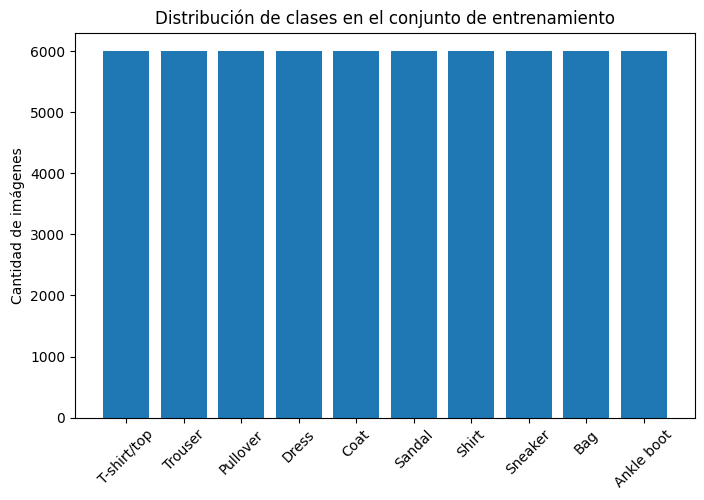

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8,5))
plt.bar(class_names, counts)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.ylabel("Cantidad de imágenes")
plt.xticks(rotation=45)
plt.show()

### **Validación del tamaño de las imágenes**

Todas las imágenes deben tener la misma dimensión (28x28 píxeles). Realizamos una verificación para asegurarnos que no existen inconsistencias.


In [46]:
print("Validando dimensiones de las imágenes:")
print(f"Dimensión única de entrenamiento: {np.unique([img.shape for img in X_train.reshape(-1,28,28)], axis=0)}")
print(f"Dimensión única de prueba: {np.unique([img.shape for img in X_test.reshape(-1,28,28)], axis=0)}")

Validando dimensiones de las imágenes:
Dimensión única de entrenamiento: [[28 28]]
Dimensión única de prueba: [[28 28]]


### **Visualización adicional: Múltiples ejemplos por clase**

Observamos ahora varios ejemplos aleatorios de cada clase para entender mejor la variabilidad dentro de cada categoría.

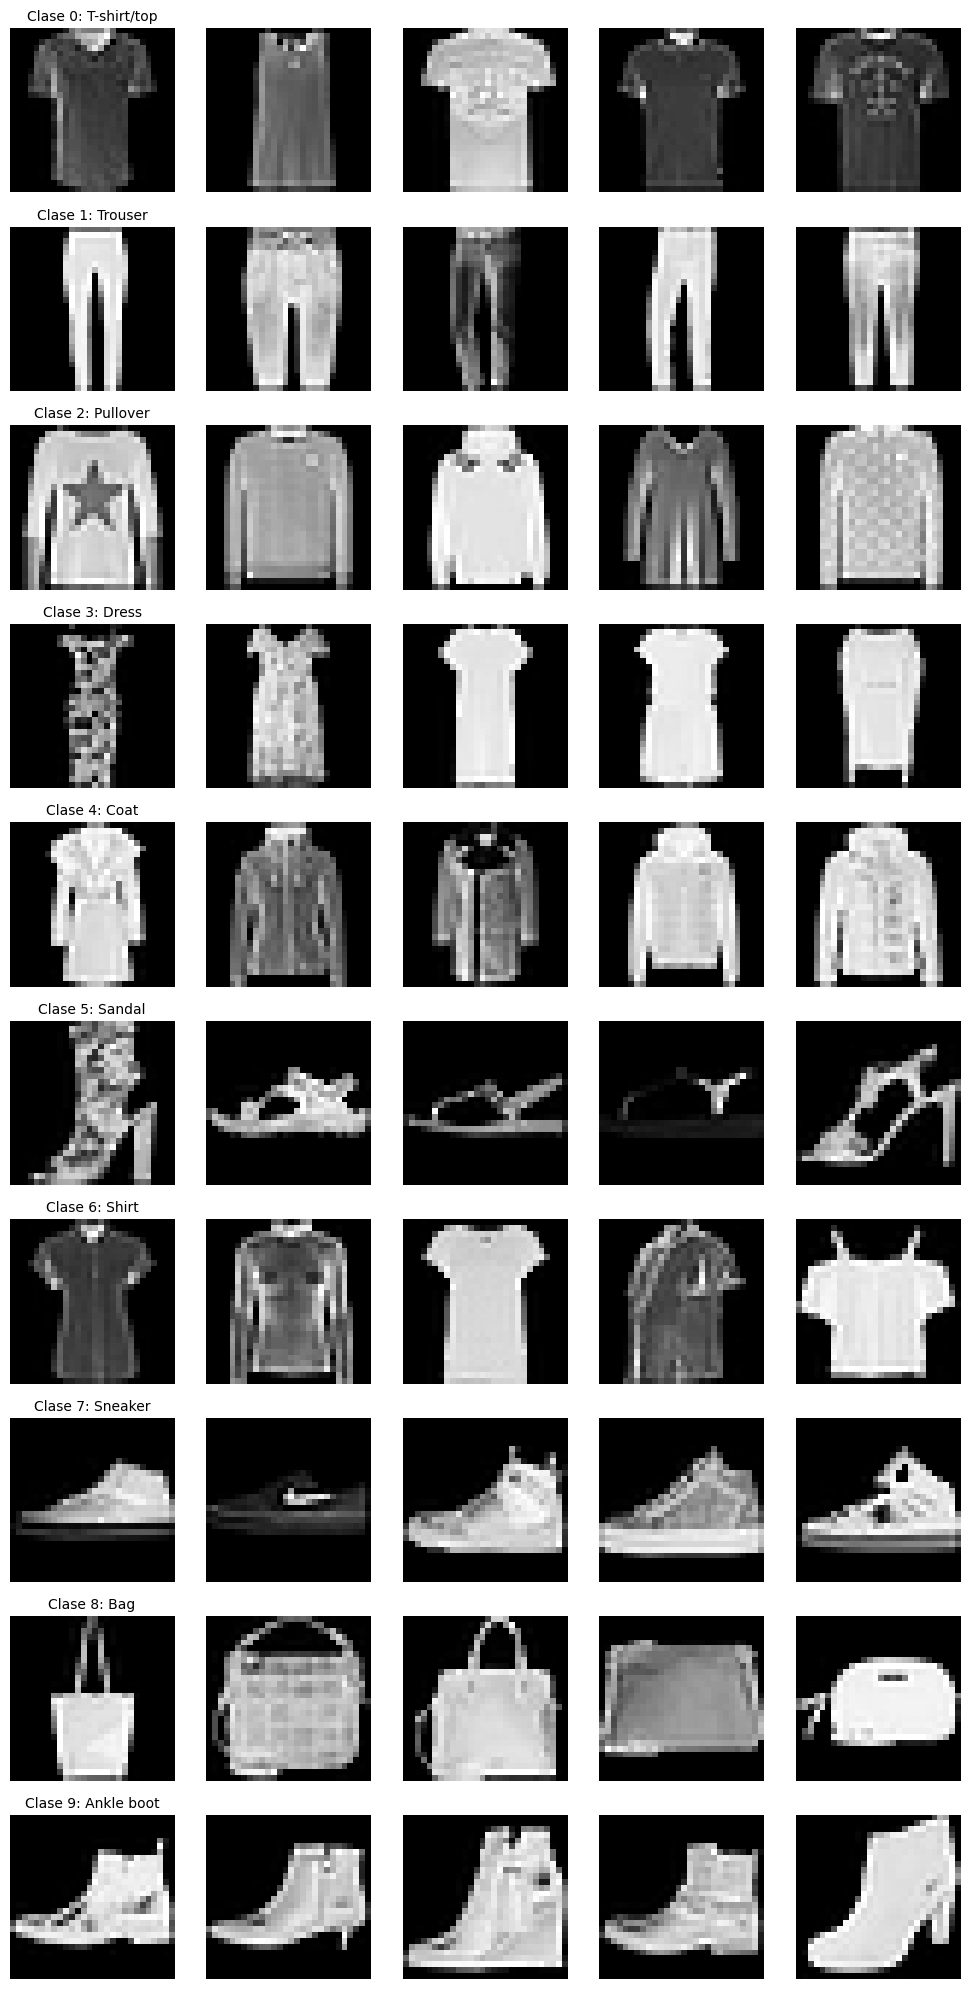

In [47]:
def visualize_multiple_per_class(X_data, y_data, samples_per_class=5):
    fig, axs = plt.subplots(10, samples_per_class, figsize=(samples_per_class*2,20))
    for i in range(10):
        idxs = np.where(y_data == i)[0]
        selected = np.random.choice(idxs, samples_per_class, replace=False)
        for j in range(samples_per_class):
            axs[i, j].imshow(X_data[selected[j]].reshape(28,28), cmap="gray")
            axs[i, j].axis('off')
            if j == 0:
                axs[i, j].set_title(f"Clase {i}: {class_names[i]}", fontsize=10)
    plt.tight_layout()
    plt.show()

visualize_multiple_per_class(X_train, y_train)

### **Análisis preliminar de balance de clases**

La distribución de las clases es completamente balanceada. Cada una de las 10 clases del dataset Fashion MNIST contiene exactamente 6000 imágenes en el conjunto de entrenamiento. Esto permite entrenar el modelo sin necesidad de aplicar técnicas de balanceo o muestreo adicional.

Además, se ha validado que todas las imágenes tienen dimensiones consistentes de 28x28 píxeles y un único canal (escala de grises), lo que facilita el preprocesamiento y asegura la homogeneidad de los datos de entrada.


## **Definición de la arquitectura de la Red Neuronal Convolucional**


En esta sección se construye el modelo de red neuronal convolucional (CNN) utilizando la API `Sequential` de Keras. El modelo recibe imágenes de 28x28 píxeles en escala de grises (un único canal). La arquitectura incluye dos bloques convolucionales seguidos de max pooling, permitiendo extraer características espaciales relevantes, seguido de una capa de aplanamiento y capas densas para la clasificación final.

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import regularizers

def load_model():
    """
    Esta función construye un modelo neuronal convolucional para el problema de clasificación
    con Fashion MNIST.

    Salida:
    model = modelo neuronal convolucional en tensorflow.keras
    """

    # Inicio del modelo con el nombre pasado por parámetro
    model = Sequential()

    # Capa de entrada dimensiones consistentes con las dimensiones de las imágenes de MNIST
    model.add(Input(shape=(28, 28, 1), name = 'Input'))

    # Modifica las capas como consideres necesario


    # Primera capa convolucinal Kernel de 3x3 y 2 filtros
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(0.01)))
    # Capa de MaxPooling
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Segunda capa convolucinal Kernel de 3x3 y 2 filtros
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(0.01)))
    # Capa de MaxPooling
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Capa de aplanamiento
    model.add(Flatten())

    # Regularización con Dropout
    model.add(Dropout(0.3))

    # Capa totalmente conectada con 100 neuronas
    model.add(Dense(100, activation='relu'))

    # Capa de salida
    model.add(Dense(10, activation='softmax', name = 'Output'))

    return model

### **Compilación y entrenamiento del modelo**

Una vez definida la arquitectura, el modelo se compila especificando:

- **Función de pérdida:** `categorical_crossentropy` (adecuada para clasificación multiclase).
- **Optimizador:** `adam` (eficiente y ampliamente utilizado en redes neuronales).
- **Métrica de evaluación:** `accuracy`.

El modelo se entrena durante 24 épocas, con un tamaño de batch de 64 muestras, utilizando validación simultánea sobre el conjunto de prueba.


In [57]:


# Compilar y entrenar el modelo

# También puedes modificar esta celda, cambiando parámetros de la compilación o del
# entrenamiento.

model = load_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
resultsFit = model.fit(X_train, y_train_onehot,
                    epochs=24,
                    batch_size = 64,
                    validation_data=(X_test, y_test_onehot))



Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7604 - loss: 0.8150 - val_accuracy: 0.8582 - val_loss: 0.4553
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8630 - loss: 0.4352 - val_accuracy: 0.8716 - val_loss: 0.4053
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8744 - loss: 0.3978 - val_accuracy: 0.8726 - val_loss: 0.3960
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8825 - loss: 0.3755 - val_accuracy: 0.8797 - val_loss: 0.3697
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8852 - loss: 0.3559 - val_accuracy: 0.8814 - val_loss: 0.3664
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8902 - loss: 0.3431 - val_accuracy: 0.8882 - val_loss: 0.3488
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8945 - loss: 0.3292 - val_accuracy: 0.8888 - val_loss: 0.3422
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8960 - loss: 0.3202 - val_accuracy: 0

### **Visualización del historial de entrenamiento**

Una vez finalizado el entrenamiento, es fundamental analizar el comportamiento del modelo a lo largo de las épocas, tanto en el conjunto de entrenamiento como en el de validación. Este análisis permite identificar posibles señales de sobreajuste, subajuste o una correcta convergencia.

La siguiente función gráfica dos curvas:

- **Precisión (accuracy):** muestra cómo evoluciona la capacidad de clasificación correcta del modelo.
- **Pérdida (loss):** muestra cómo disminuye el error de predicción durante el entrenamiento.

Se incluye además una línea de referencia correspondiente al umbral de 90% de precisión en validación, como objetivo deseado de desempeño.


In [55]:
def visualization_history(resultsFit):
    """
    Esta función grafica las curvas de precisión a lo largo de las épocas de entrenamiento
    para el conjunto de prueba como el de validación.
    Parámetros:
    resultsFit = historial de entrenamiento de un modelo entensorflow.keras
    Salida:
    Gráfica de la precisión en validación y prueba.
    """
    # Llamado al entrono de la gráfica y fijar tamaño de visualización
    fig, axes = plt.subplots(1, 2, figsize=(13, 5))

    # Graficar la presición de la historia en entrenamiento
    axes[0].plot(range(len(resultsFit.history['accuracy'])), resultsFit.history['accuracy'],
           '#5a2ff4', linestyle = "-", marker = "o",
           label='Precisión entrenamiento', lw = 3)

    # Graficar la presición de la historia en validación
    axes[0].plot(range(len(resultsFit.history['val_accuracy'])), resultsFit.history['val_accuracy'],  '#60d13e',
           label='Precisión validación', linestyle = '-', marker = 'o', lw = 3)

    # Umbral 90% de precisión
    axes[0].plot(range(len(resultsFit.history['val_accuracy'])), 0.9*np.ones(len(resultsFit.history['val_accuracy'])),
               'red', lw = 3, label = 'Umbral')

    # Títulos de los ejes
    axes[0].set_xlabel('Época',fontsize=16)
    axes[0].set_ylabel(r'Precisión',fontsize=16)
    axes[0].set_ylim(top=1) # Límite de la grafica
    axes[0].grid()      # Activar la cuadricula
    axes[0].legend(fontsize=14,loc = 'lower right')   # Establecer la legenda


    # Graficar la pérdida de la historia en entrenamiento
    axes[1].plot(range(len(resultsFit.history['loss'])), resultsFit.history['loss'],
           '#5a2ff4', linestyle = "-", marker = "o",
           label='Pérdida entrenamiento', lw = 3)

    # Graficar la presición de la historia en validación
    axes[1].plot(range(len(resultsFit.history['val_loss'])), resultsFit.history['val_loss'],  '#60d13e',
           label='Pérdida validación', linestyle = '-', marker = 'o', lw = 3)

    # Títulos de los ejes
    axes[1].set_xlabel('Época',fontsize=16)
    axes[1].set_ylabel(r'Pérdida',fontsize=16)
    axes[1].grid()      # Activar la cuadricula
    axes[1].legend(fontsize=14,loc = 'upper right')   # Establecer la legenda


    plt.tight_layout() # Ajusta automáticamente el diseño de la figura
    plt.show()

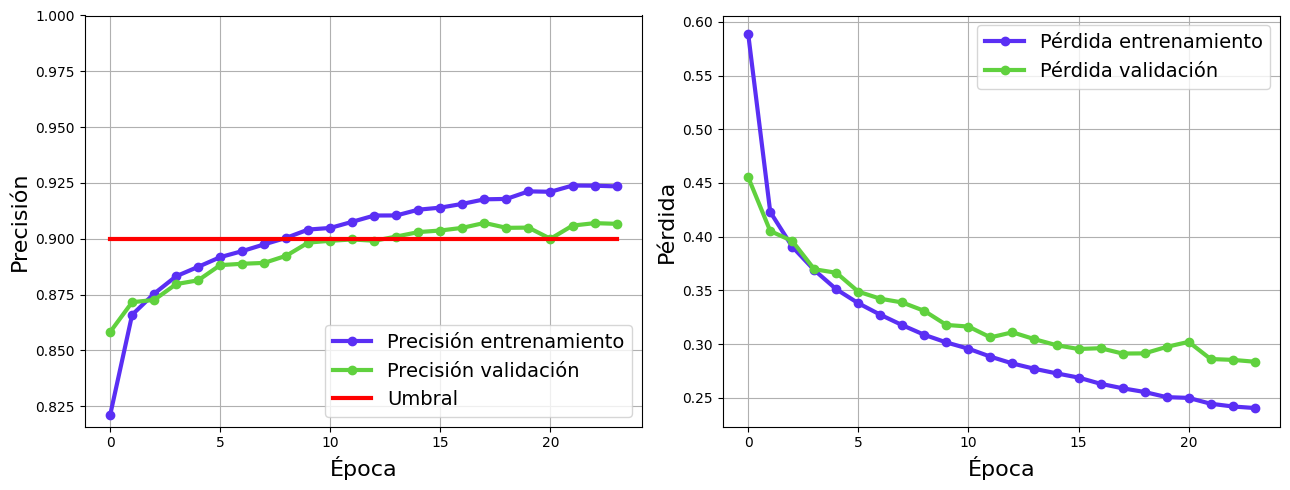

In [58]:
# Llamado a la función de visualización de las métricas de la historia del entrenamiento
# del modelo, en la prrimera gráfica se presenta la precisión y en la segunda la pérdida
visualization_history(resultsFit)

### **Análisis de resultados**

A partir de las curvas observadas, se puede destacar:

- El modelo logra alcanzar y superar el umbral de **90% de precisión en validación** después de la época 10, estabilizándose cerca de 91% al final del entrenamiento.
- La precisión en entrenamiento continúa aumentando de forma más pronunciada, lo que indica que el modelo sigue aprendiendo bien sobre los datos de entrenamiento.
- Las curvas de pérdida muestran un comportamiento adecuado: ambas disminuyen consistentemente, sin indicios claros de sobreajuste severo.
- Las técnicas de regularización aplicadas (Dropout y L2) parecen haber ayudado a mantener un buen balance entre aprendizaje y generalización.

En conjunto, este resultado refleja un modelo sólido y balanceado para la tarea de clasificación de Fashion MNIST.


### **Evaluación final: Matriz de Confusión**


La matriz de confusión permite evaluar de forma detallada el desempeño del modelo para cada clase individual, mostrando cuántas predicciones fueron correctas y en qué clases se produjeron los errores. Esto facilita identificar patrones de confusión entre clases similares.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


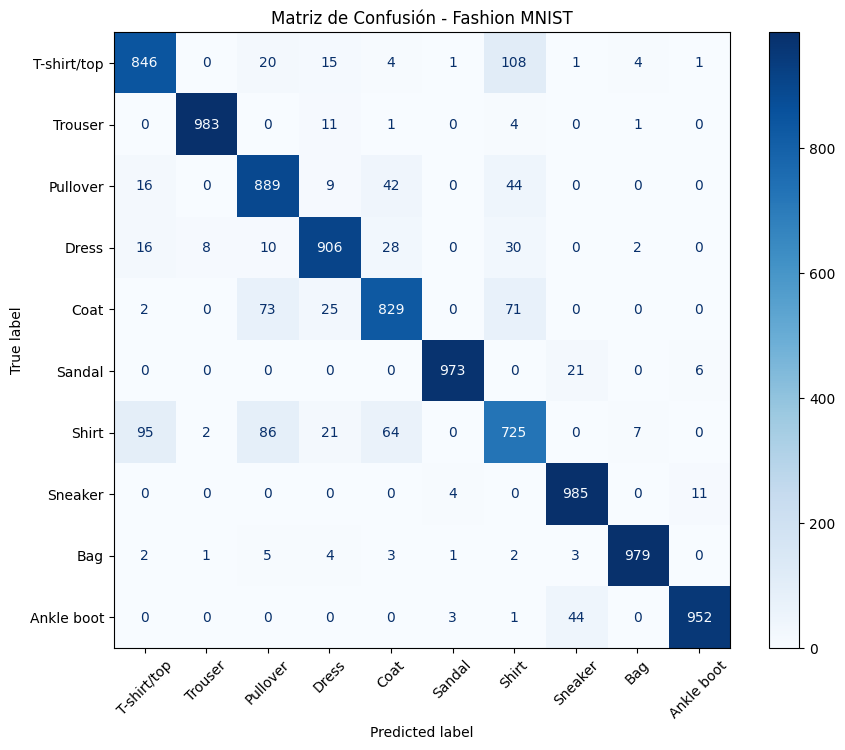

In [59]:
# Realizamos las predicciones sobre el conjunto de prueba
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title("Matriz de Confusión - Fashion MNIST")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

### **Análisis de la matriz de confusión**

La matriz de confusión evidencia que el modelo tiene un buen desempeño general en todas las clases, logrando altos valores en la diagonal (predicciones correctas).

- Las clases `Sandal`, `Sneaker` y `Ankle boot` muestran los mayores niveles de precisión, con muy pocas confusiones.
- Se observa cierta confusión entre clases similares como `Pullover`, `Coat` y `Shirt`, lo cual es esperable dada la similitud visual entre estos artículos de ropa.
- El análisis de la matriz de confusión permite detectar estas áreas específicas donde el modelo podría beneficiarse de ajustes adicionales, como técnicas de aumento de datos o arquitecturas más profundas para una mejor diferenciación.

En general, el modelo logra una clasificación robusta y estable en la mayoría de las categorías del conjunto Fashion MNIST.


## **Conclusiones**

- El modelo de red neuronal convolucional diseñado para el dataset Fashion MNIST ha logrado un desempeño sólido, alcanzando una precisión de validación superior al 90% de forma consistente.
- Las técnicas de regularización aplicadas (L2 y Dropout) fueron efectivas para mitigar el riesgo de sobreajuste, permitiendo un aprendizaje estable incluso con un número relativamente moderado de parámetros.
- Las curvas de entrenamiento muestran una convergencia progresiva sin incrementos abruptos en la pérdida de validación, lo que evidencia una adecuada capacidad de generalización sobre los datos no vistos.
- El análisis de la matriz de confusión permitió identificar algunas categorías con mayor dificultad de clasificación, principalmente entre prendas visualmente similares como `Pullover`, `Coat` y `Shirt`, mientras que categorías como `Sneaker` y `Sandal` fueron clasificadas con alta precisión.

## **Recomendaciones**

- Podría explorarse el uso de **data augmentation** (rotaciones, desplazamientos, cambios de escala) para ampliar la variabilidad del conjunto de entrenamiento, especialmente en aquellas clases que presentan confusiones recurrentes.
- La incorporación de arquitecturas más profundas o avanzadas, como **Redes Residuales (ResNet)** o **Vision Transformers (ViT)**, podría ofrecer mejoras adicionales en la capacidad de discriminación entre clases similares.
- La aplicación de técnicas de ajuste fino (fine-tuning) sobre modelos preentrenados en grandes bases de imágenes podría potenciar el rendimiento sin necesidad de entrenar desde cero.
- Para un análisis productivo a nivel industrial, se recomienda incluir además métricas como **precisión, recall y F1-score por clase**, para evaluar con mayor detalle el comportamiento específico de cada categoría.

